In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('SuperStore_Sales_Dataset_Program.csv')

# Display the first few rows of the dataframe
print(data.head())


   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0    4918  CA-2019-160304  01-01-2019  2019-01-07  Standard Class    BM-11575   
1    4919  CA-2019-160304  02-01-2019  2019-01-08  Standard Class    BM-11575   
2    4920  CA-2019-160304  02-01-2019  2019-01-09  Standard Class    BM-11575   
3    3074  CA-2019-125206  03-01-2019  2019-01-10     First Class    LR-16915   
4    8604  US-2019-116365  03-01-2019  2019-01-11  Standard Class    CA-12310   

       customer_name    segment        country          city  ...   region  \
0      Brendan Murry  Corporate  United States  Gaithersburg  ...     East   
1      Brendan Murry  Corporate  United States  Gaithersburg  ...     East   
2      Brendan Murry  Corporate  United States  Gaithersburg  ...     East   
3       Lena Radford   Consumer  United States   Los Angeles  ...     West   
4  Christine Abelman  Corporate  United States   San Antonio  ...  Central   

        product_id         category sub_cate

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SuperStore_Sales_Dataset_Program.csv')

# Convert date columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Inspect the dataset
print(df.head())


ValueError: time data "14-01-2019" doesn't match format "%m-%d-%Y", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
# Group by customer_id to create customer-level features
customer_df = df.groupby('customer_id').agg({
    'sales': 'sum',
    'quantity': 'sum',
    'order_id': 'count'
}).rename(columns={
    'sales': 'total_sales',
    'quantity': 'total_quantity',
    'order_id': 'order_count'
}).reset_index()

# Inspect the customer-level dataframe
print(customer_df.head())



  customer_id  total_sales  total_quantity  order_count
0    AA-10315     4919.552              19            6
1    AA-10375     2015.020              20            9
2    AA-10480     1862.052              34           11
3    AA-10645     1757.145              34            9
4    AB-10015      563.940               4            2


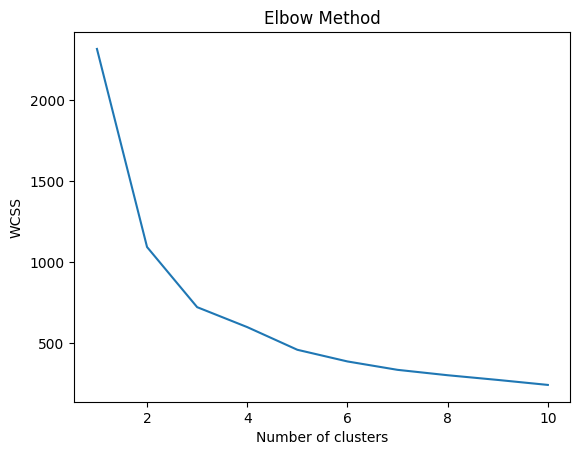

  customer_id  total_sales  total_quantity  order_count  cluster
0    AA-10315     4919.552              19            6        0
1    AA-10375     2015.020              20            9        0
2    AA-10480     1862.052              34           11        0
3    AA-10645     1757.145              34            9        0
4    AB-10015      563.940               4            2        2


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['total_sales', 'total_quantity', 'order_count']])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Choose an appropriate number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['cluster'] = kmeans.fit_predict(scaled_features)

# Inspect the clustered dataframe
print(customer_df.head())



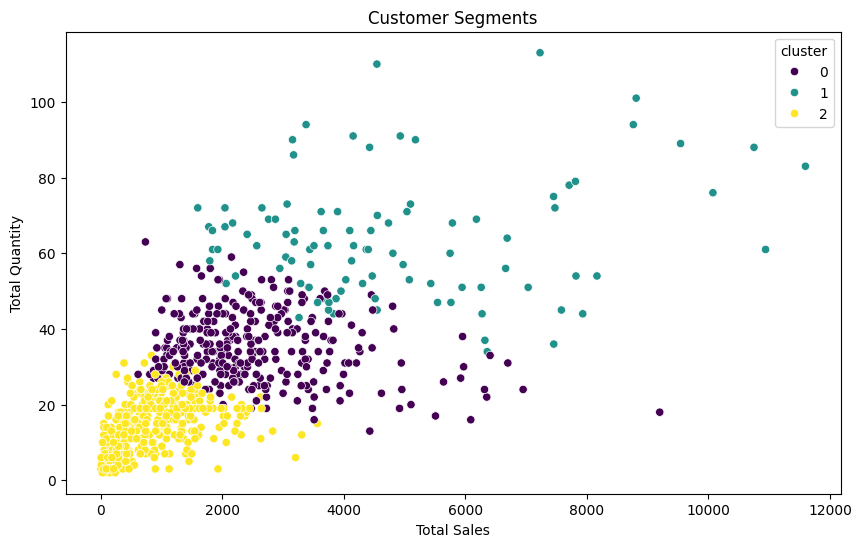

In [6]:
import seaborn as sns

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_df, x='total_sales', y='total_quantity', hue='cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Sales')
plt.ylabel('Total Quantity')
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate sales data by order_date
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()

# Set order_date as index
daily_sales.set_index('order_date', inplace=True)

# Fit ARIMA model
model = ARIMA(daily_sales['sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 15 days
forecast = model_fit.forecast(steps=15)
print(forecast)


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


643    1627.669069
644    2396.372571
645    2274.487965
646    1778.709710
647    1838.004674
648    2190.458326
649    1951.559390
650    2103.643782
651    2060.670610
652    1982.172948
653    2001.050019
654    2055.477636
655    2014.003891
656    2043.128524
657    2031.874219
Name: predicted_mean, dtype: float64


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


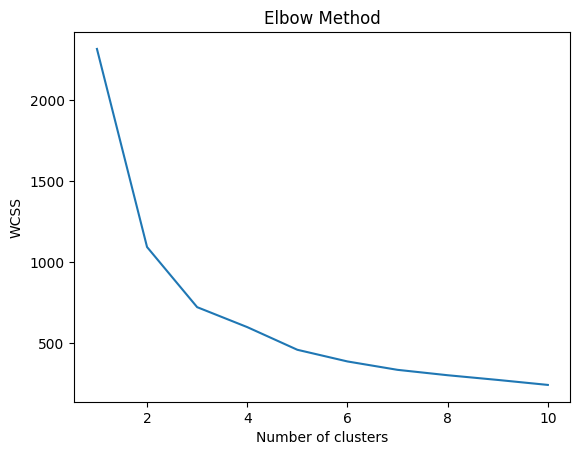

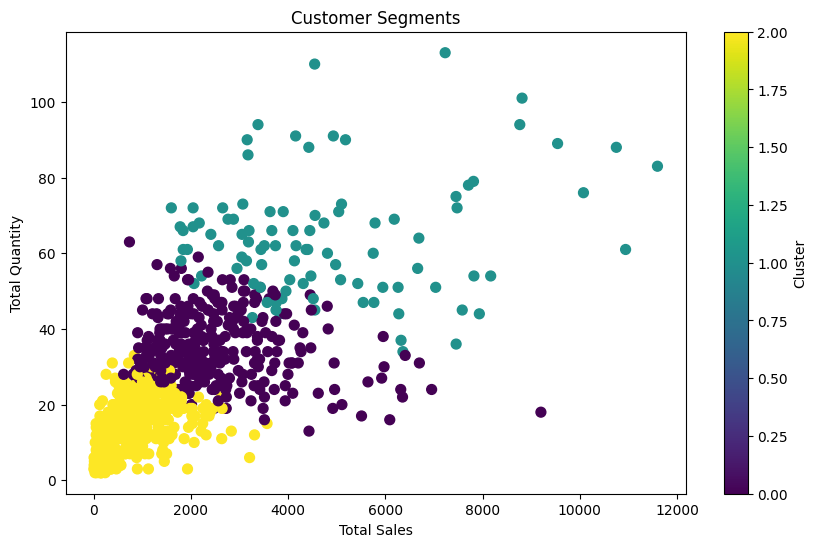

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

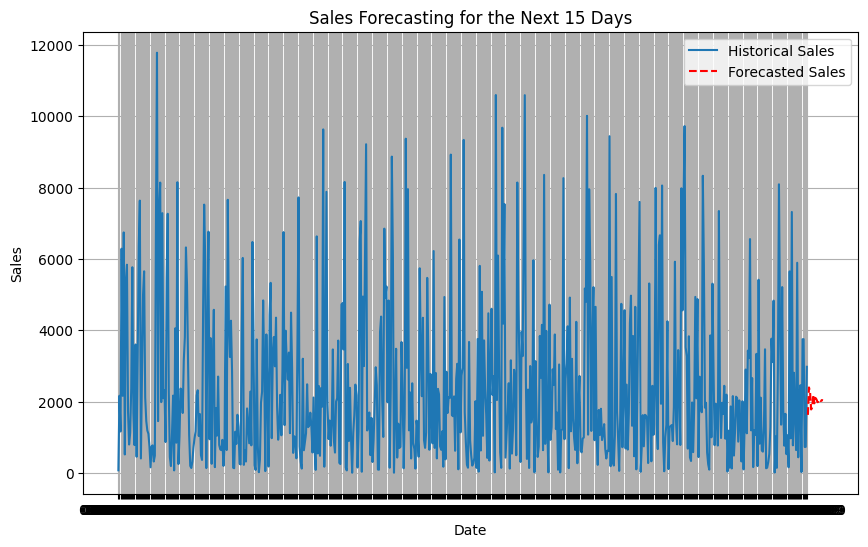

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('SuperStore_Sales_Dataset_Program.csv')



# Group by customer_id to create customer-level features
customer_df = df.groupby('customer_id').agg({
    'sales': 'sum',
    'quantity': 'sum',
    'order_id': 'count'
}).rename(columns={
    'sales': 'total_sales',
    'quantity': 'total_quantity',
    'order_id': 'order_count'
}).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['total_sales', 'total_quantity', 'order_count']])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Choose an appropriate number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(customer_df['total_sales'], customer_df['total_quantity'], c=customer_df['cluster'], cmap='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('Total Sales')
plt.ylabel('Total Quantity')
plt.colorbar(label='Cluster')
plt.show()

# Aggregate sales data by order_date
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()

# Set order_date as index
daily_sales.set_index('order_date', inplace=True)

# Fit ARIMA model
model = ARIMA(daily_sales['sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 15 days
forecast = model_fit.forecast(steps=15)

# Plot historical sales data and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['sales'], label='Historical Sales')
plt.plot(forecast.index, forecast.values, color='red', linestyle='--', label='Forecasted Sales')
plt.title('Sales Forecasting for the Next 15 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class SalesAnalysisApp:
    def __init__(self, root):
        self.root = root
        self.root.title("SuperStore Sales Analysis")
        self.root.geometry("800x600")

        self.df = None
        self.customer_df = None
        self.daily_sales = None

        self.create_widgets()

    def create_widgets(self):
        self.load_button = ttk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=20)

        self.cluster_button = ttk.Button(self.root, text="Run Clustering", command=self.run_clustering)
        self.cluster_button.pack(pady=20)

        self.forecast_button = ttk.Button(self.root, text="Run Forecasting for next 15 Days", command=self.run_forecasting)
        self.forecast_button.pack(pady=20)

        self.figure_frame = ttk.Frame(self.root)
        self.figure_frame.pack(fill=tk.BOTH, expand=True)

    def load_dataset(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.df = pd.read_csv(file_path)
            tk.messagebox.showinfo("Info", "Dataset loaded successfully!")

    def run_clustering(self):
        if self.df is None:
            tk.messagebox.showerror("Error", "Please load the dataset first.")
            return

        self.customer_df = self.df.groupby('customer_id').agg({
            'sales': 'sum',
            'quantity': 'sum',
            'order_id': 'count'
        }).rename(columns={
            'sales': 'total_sales',
            'quantity': 'total_quantity',
            'order_id': 'order_count'
        }).reset_index()

        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(self.customer_df[['total_sales', 'total_quantity', 'order_count']])

        wcss = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, random_state=42)
            kmeans.fit(scaled_features)
            wcss.append(kmeans.inertia_)

        fig, ax = plt.subplots()
        ax.plot(range(1, 11), wcss)
        ax.set_xlabel('Number of clusters')
        ax.set_ylabel('WCSS')
        ax.set_title('Elbow Method')

        self.display_figure(fig)

        # Choose an appropriate number of clusters (e.g., 3)
        kmeans = KMeans(n_clusters=3, random_state=42)
        self.customer_df['cluster'] = kmeans.fit_predict(scaled_features)

        fig, ax = plt.subplots()
        scatter = ax.scatter(self.customer_df['total_sales'], self.customer_df['total_quantity'], c=self.customer_df['cluster'], cmap='viridis', s=50)
        ax.set_title('Customer Segments')
        ax.set_xlabel('Total Sales')
        ax.set_ylabel('Total Quantity')
        plt.colorbar(scatter, ax=ax, label='Cluster')

        self.display_figure(fig)

    def run_forecasting(self):
        if self.df is None:
            tk.messagebox.showerror("Error", "Please load the dataset first.")
            return

        self.daily_sales = self.df.groupby('order_date')['sales'].sum().reset_index()
        self.daily_sales.set_index('order_date', inplace=True)

        model = ARIMA(self.daily_sales['sales'], order=(5, 1, 0))
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=15)

        fig, ax = plt.subplots()
        ax.plot(self.daily_sales.index, self.daily_sales['sales'], label='Historical Sales')
        ax.plot(forecast.index, forecast.values, color='red', linestyle='--', label='Forecasted Sales')
        ax.set_title('Sales Forecasting for the Next 15 Days')
        ax.set_xlabel('Date')
        ax.set_ylabel('Sales')
        ax.legend()
        ax.grid(True)

        self.display_figure(fig)

    def display_figure(self, fig):
        for widget in self.figure_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=self.figure_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

if __name__ == "__main__":
    root = tk.Tk()
    app = SalesAnalysisApp(root)
    root.mainloop()


KeyboardInterrupt: 

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('SuperStore_Sales_Dataset_Program.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

# Feature Engineering: Creating a supervised learning problem
data['sales_diff'] = data['sales'].diff()
data.dropna(inplace=True)

def create_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Creating supervised data for the last 24 months
supervised_data = create_supervised(data['sales_diff'], 12)

# Splitting data into train and test sets
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

# Scaling features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Splitting data into input and output
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

# Creating a DataFrame to store predictions
sales_dates = data.index[-13:].to_series().reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates, columns=['date'])

# Actual sales for the last 13 months
actual_sales = data['sales'].values[-13:]

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predict = lr_model.predict(x_test)

# Inverse transform to original scale
lr_predict = scaler.inverse_transform(np.concatenate((lr_predict, x_test), axis=1))[:, 0]

# Calculating predicted sales
result_list = []
for index in range(len(lr_predict)):
    result_list.append(lr_predict[index] + actual_sales[index])

lr_predict_series = pd.Series(result_list, name='linear_prediction')

# Merging with prediction DataFrame
predict_df = predict_df.join(lr_predict_series)

# Model Evaluation
lr_mse = np.sqrt(mean_squared_error(actual_sales[1:], lr_predict[:-1]))
lr_mae = mean_absolute_error(actual_sales[1:], lr_predict[:-1])
lr_r2 = r2_score(actual_sales[1:], lr_predict[:-1])

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

# Plotting actual sales vs predicted sales
plt.figure(figsize=(15, 5))
plt.plot(data.index[-13:], actual_sales, label='Actual Sales')
plt.plot(predict_df['date'], predict_df['linear_prediction'], label='Predicted Sales', linestyle='--')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


ValueError: Missing column provided to 'parse_dates': 'date'